# Unsupervised Learning: Clustering and Dimensionality Reduction

## Section 1 - Comparing clustering algorithms

In [19]:
# All code in this cell provided by course instructor
################################
# Load the data
################################
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons

# Create / load the datasets:
n_samples = 1500
X0, _ = make_blobs(n_samples=n_samples, centers=2, n_features=2, random_state=0)
X1, _ = make_blobs(n_samples=n_samples, centers=5, n_features=2, random_state=0)

random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state, cluster_std=1.3)
transformation = [[0.6, -0.6], [-0.2, 0.8]]
X2 = np.dot(X, transformation)
X3, _ = make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)
X4, _ = make_moons(n_samples=n_samples, noise=.12)

X = [X0, X1, X2, X3, X4]
# The datasets are X[i], where i ranges from 0 to 4

In [20]:
# All code in this cell provided by course instructor
################################
# Code to plot clusters
################################
def plot_cluster(ax, data, cluster_assignments):
    '''Plot two-dimensional data clusters
    
    Parameters
    ----------
    ax : matplotlib axis
        Axis to plot on
    data : list or numpy array of size [N x 2] 
        Clustered data
    cluster_assignments : list or numpy array [N]
        Cluster assignments for each point in data

    '''
    clusters = np.unique(cluster_assignments)
    n_clusters = len(clusters)
    for ca in clusters:
        kwargs = {}
        if ca == -1:
            # if samples are not assigned to a cluster (have a cluster assignment of -1, color them gray)
            kwargs = {'color':'gray'}
            n_clusters = n_clusters - 1
        ax.scatter(data[cluster_assignments==ca, 0], data[cluster_assignments==ca, 1],s=5,alpha=0.5, **kwargs)
        ax.set_xlabel('feature 1')
        ax.set_ylabel('feature 2')
        ax.set_title(f'No. Clusters = {n_clusters}')
        ax.axis('equal')

### (a) K-means

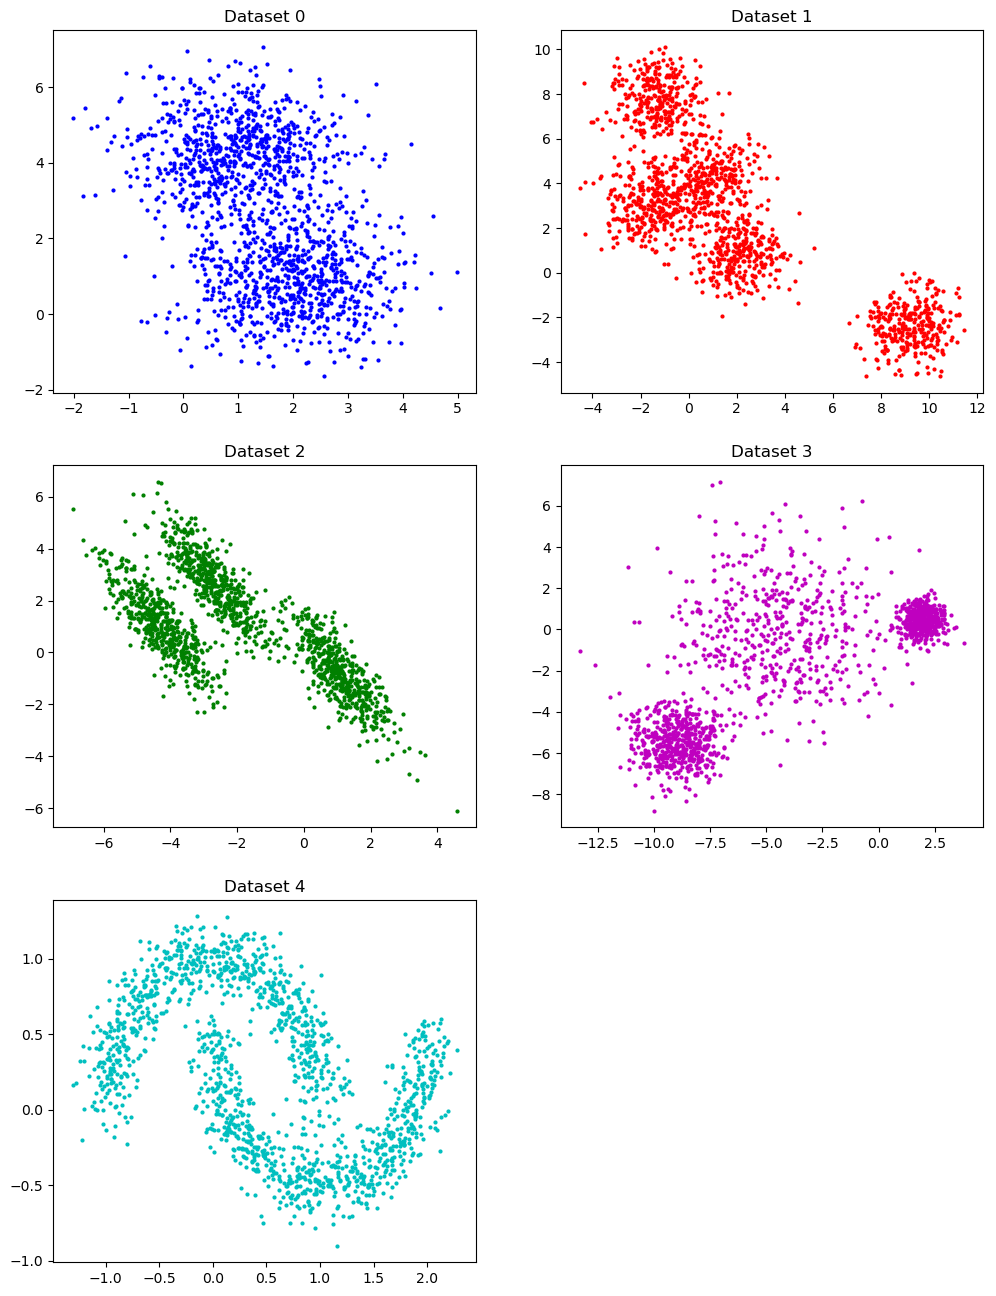

In [3]:
# Scatterplots for each dataset
fig, ax = plt.subplots(3, 2, figsize=(12, 16))

ax[0,0].scatter(x=X[0][:,0], y=X[0][:,1], s=4, c="b");
ax[0,0].set_title("Dataset 0");

ax[0,1].scatter(x=X[1][:,0], y=X[1][:,1], s=4, c="r");
ax[0,1].set_title("Dataset 1");

ax[1,0].scatter(x=X[2][:,0], y=X[2][:,1], s=4, c="g");
ax[1,0].set_title("Dataset 2");

ax[1,1].scatter(x=X[3][:,0], y=X[3][:,1], s=4, c="m");
ax[1,1].set_title("Dataset 3");

ax[2,0].scatter(x=X[4][:,0], y=X[4][:,1], s=4, c="c");
ax[2,0].set_title("Dataset 4");

ax[2,1].set_axis_off();

In [4]:
# For each dataset, for each value of k in [0...10], run k-means and get inertia
from sklearn.cluster import KMeans

inertias = np.zeros((5, 10))
# For each dataset
for i in range(5):
    data = X[i]
    inertia = np.zeros((10))
    # For each value of k in [1 ... 10]
    for k in range(1, 11):
        # Run k-means
        kmeans = KMeans(n_clusters=k, random_state=1).fit(data)
        # Get inertia
        inertia[k-1] = kmeans.inertia_
    inertias[i] = inertia

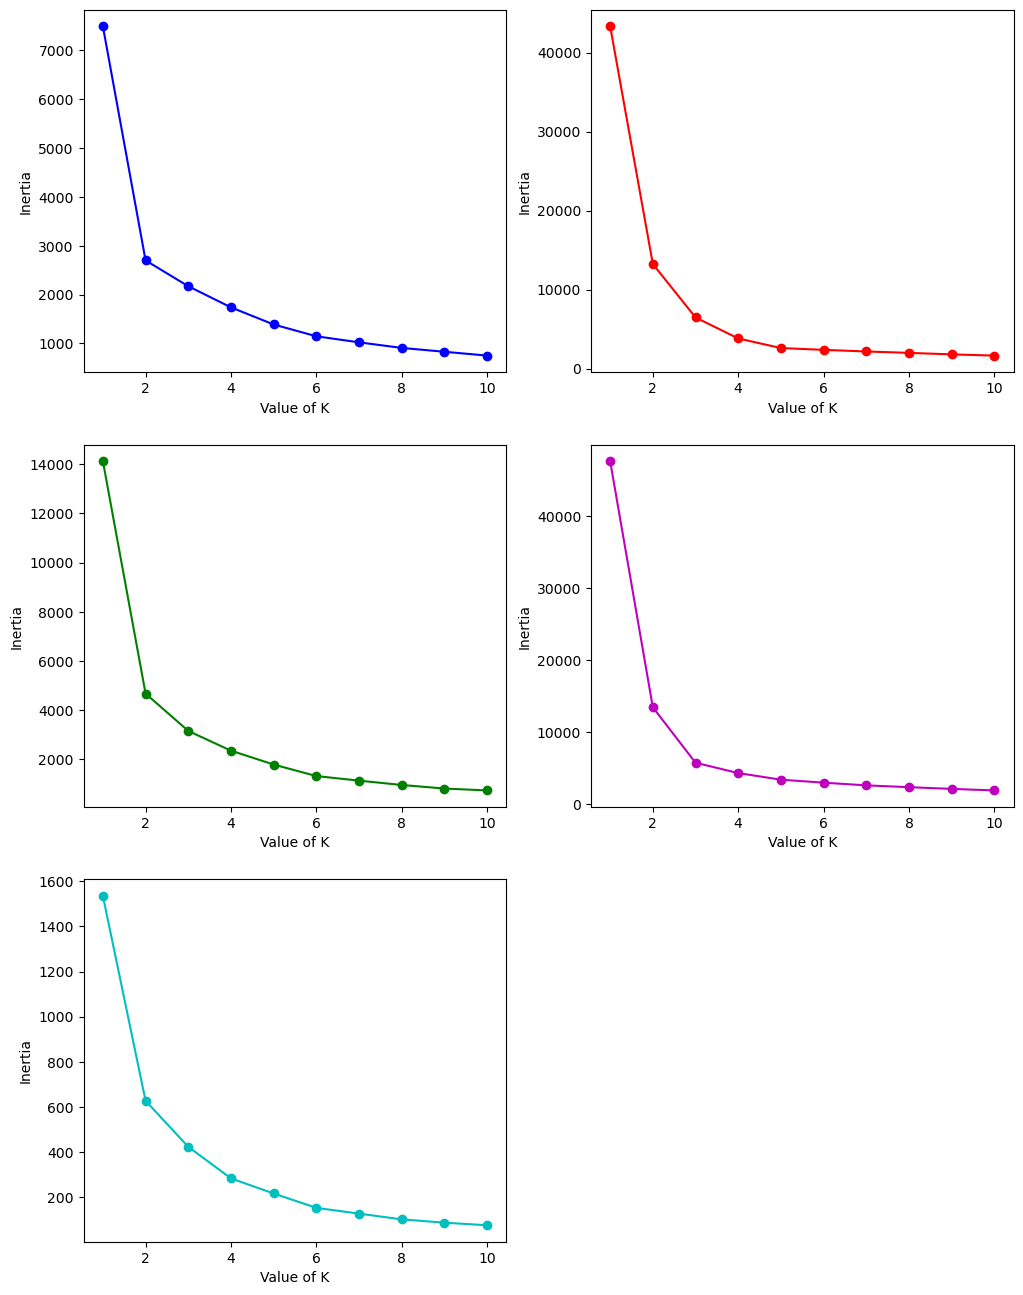

In [5]:
# Plot inertia vs. k for each dataset
fig, ax = plt.subplots(3, 2, figsize=(12, 16))
ks = np.arange(1, 11)

ax[0,0].plot(ks, inertias[0], c="b", marker="o", linestyle="-");
ax[0,0].set_xlabel("Value of K")
ax[0,0].set_ylabel("Inertia")

ax[0,1].plot(ks, inertias[1], c="r", marker="o", linestyle="-");
ax[0,1].set_xlabel("Value of K")
ax[0,1].set_ylabel("Inertia")

ax[1,0].plot(ks, inertias[2], c="g", marker="o", linestyle="-");
ax[1,0].set_xlabel("Value of K")
ax[1,0].set_ylabel("Inertia")

ax[1,1].plot(ks, inertias[3], c="m", marker="o", linestyle="-");
ax[1,1].set_xlabel("Value of K")
ax[1,1].set_ylabel("Inertia")

ax[2,0].plot(ks, inertias[4], c="c", marker="o", linestyle="-");
ax[2,0].set_xlabel("Value of K")
ax[2,0].set_ylabel("Inertia")

ax[2,1].set_axis_off()

<font size="4"> Increasing the value of k will always result in less within-cluster dissimilarity (lower inertia), but increasing k also runs the risk of overfitting to the data. In each of the five plots above, we want to find the "elbow," the value of k after which increasing k further doesn't result in much decrease in inertia. It isn't always clear exactly where the elbow is. In these cases, it's helpful to look at the scatterplot and see what number of clusters seems most appropriate for the data (how many clusters can be visually identified in the scatterplot).
    
<font size="4"> **Dataset 0 (Blue):** There is a clear elbow in this plot at K = 2, and the scatterplot shows two fairly distinct clusters.
    
<font size="4"> **Dataset 1 (Red):** The elbow appears to lie at K = 2, 3, or 4. The scatterplot clearly shows four distinct clusters, so we'll go with K = 4.
    
<font size="4"> **Dataset 2 (Green):** The elbow is very hard to identify - perhaps K = 2 or K = 3. The scatterplot clearly shows three distinct clusters, so we'll go with K = 3.
    
<font size="4"> **Dataset 3 (Magenta):** The elbow is clearly at K = 3, which is reflected clearly in the scatterplot.
    
<font size="4"> **Dataset 4 (Cerulean):** The elbow is quite difficult to identify - perhaps K = 2, 3, or 4. The scatterplot shows two clear half-moon-shaped clusters, so we'll go with K = 2.

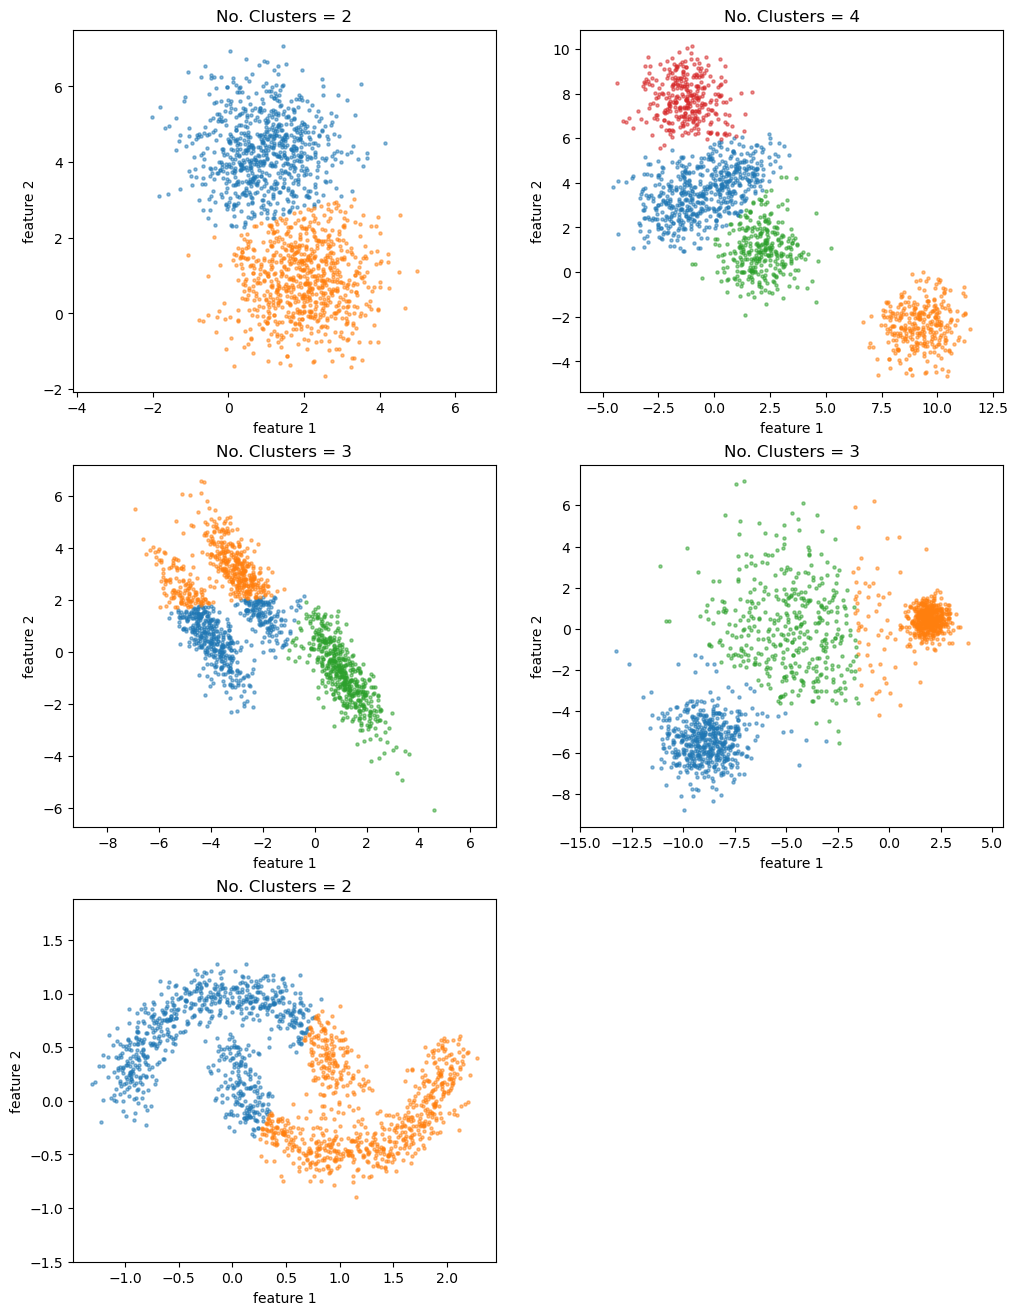

In [6]:
# Fit K-means to each dataset using optimal value of K
kmeans_0 = KMeans(n_clusters=2, random_state=1).fit(X[0])
kmeans_1 = KMeans(n_clusters=4, random_state=1).fit(X[1])
kmeans_2 = KMeans(n_clusters=3, random_state=1).fit(X[2])
kmeans_3 = KMeans(n_clusters=3, random_state=1).fit(X[3])
kmeans_4 = KMeans(n_clusters=2, random_state=1).fit(X[4])

# Plot clusters in different colors for each dataset
fig, ax = plt.subplots(3, 2, figsize=(12, 16))
plot_cluster(ax[0,0], X[0], kmeans_0.labels_)
plot_cluster(ax[0,1], X[1], kmeans_1.labels_)
plot_cluster(ax[1,0], X[2], kmeans_2.labels_)
plot_cluster(ax[1,1], X[3], kmeans_3.labels_)
plot_cluster(ax[2,0], X[4], kmeans_4.labels_)

ax[2,1].set_axis_off();

<font size="4"> As expected, k-means did not perform well on Dataset 2 (correlation between features), Dataset 3 (vastly different variance between the three different clusters), and Dataset 4 (nonlinear boundaries between clusters). We expect DBSCAN to handle Dataset 2 and Dataset 4 much better than k-means, but we expect k-means to still have the edge for Dataset 3 (even though k-means doesn't perform that well on Dataset 4).

### (b) DBSCAN

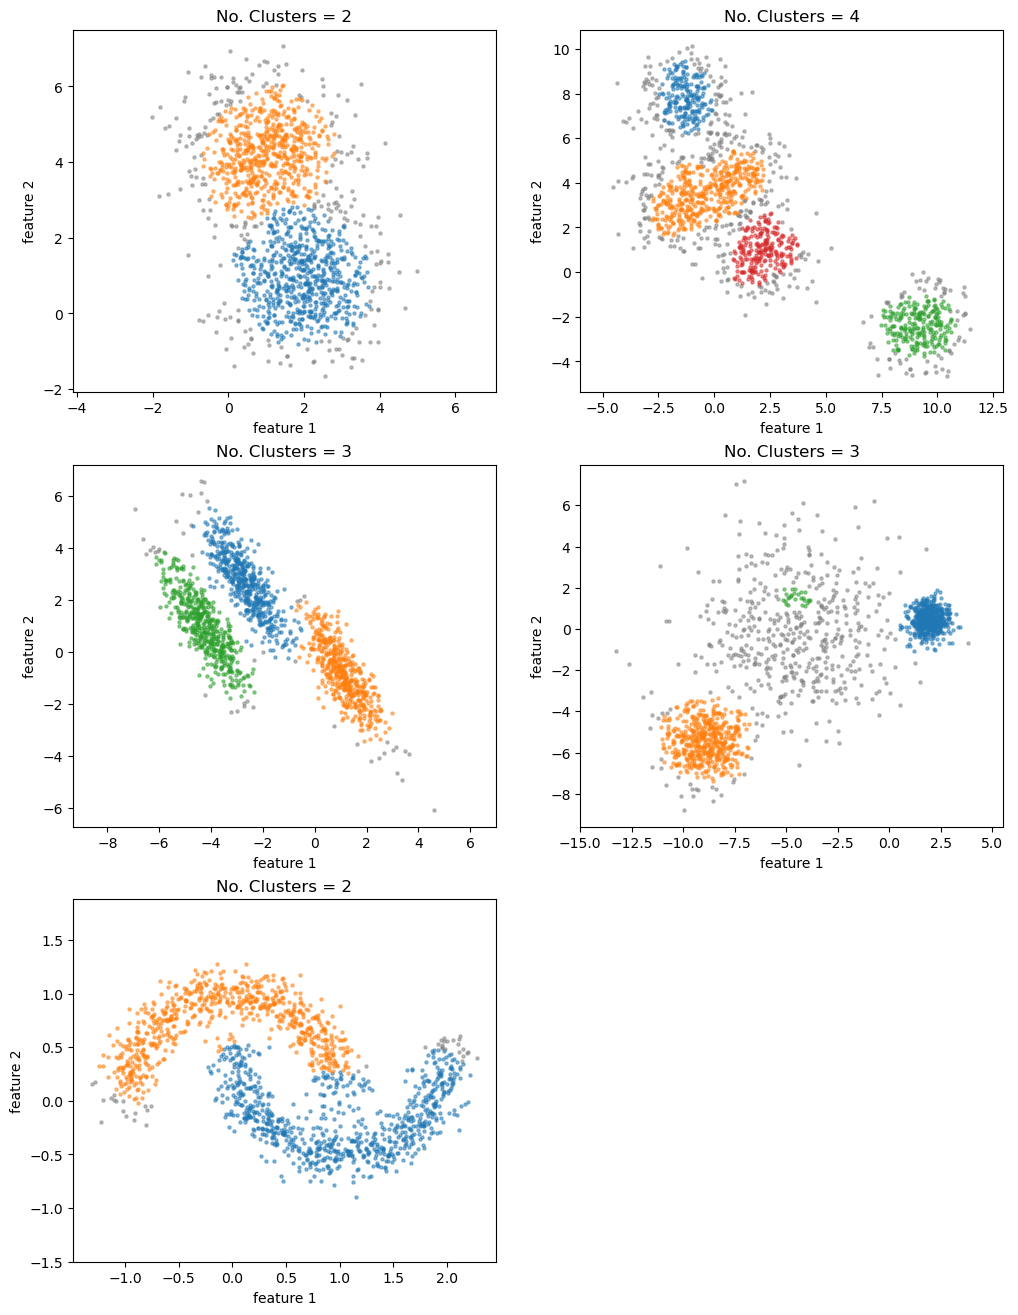

In [8]:
from sklearn.cluster import DBSCAN

# Fit DBSCAN model to each dataset
dbscan_0 = DBSCAN(eps=0.54, min_samples=50).fit(X[0])
dbscan_1 = DBSCAN(eps=0.47, min_samples=20).fit(X[1])
dbscan_2 = DBSCAN(eps=0.55, min_samples=20).fit(X[2])
dbscan_3 = DBSCAN(eps=0.52, min_samples=15).fit(X[3])
dbscan_4 = DBSCAN(eps=0.44, min_samples=200).fit(X[4])

# Plot each cluster in different colors
fig, ax = plt.subplots(3, 2, figsize=(12, 16))

plot_cluster(ax[0,0], X[0], dbscan_0.labels_)
plot_cluster(ax[0,1], X[1], dbscan_1.labels_)
plot_cluster(ax[1,0], X[2], dbscan_2.labels_)
plot_cluster(ax[1,1], X[3], dbscan_3.labels_)
plot_cluster(ax[2,0], X[4], dbscan_4.labels_)
ax[2,1].set_axis_off()

<font size="4"> As expected, DBSCAN performs better than k-means when there are nonlinear boundaries between clusters and when features are correlated.

### (c) Spectral clustering

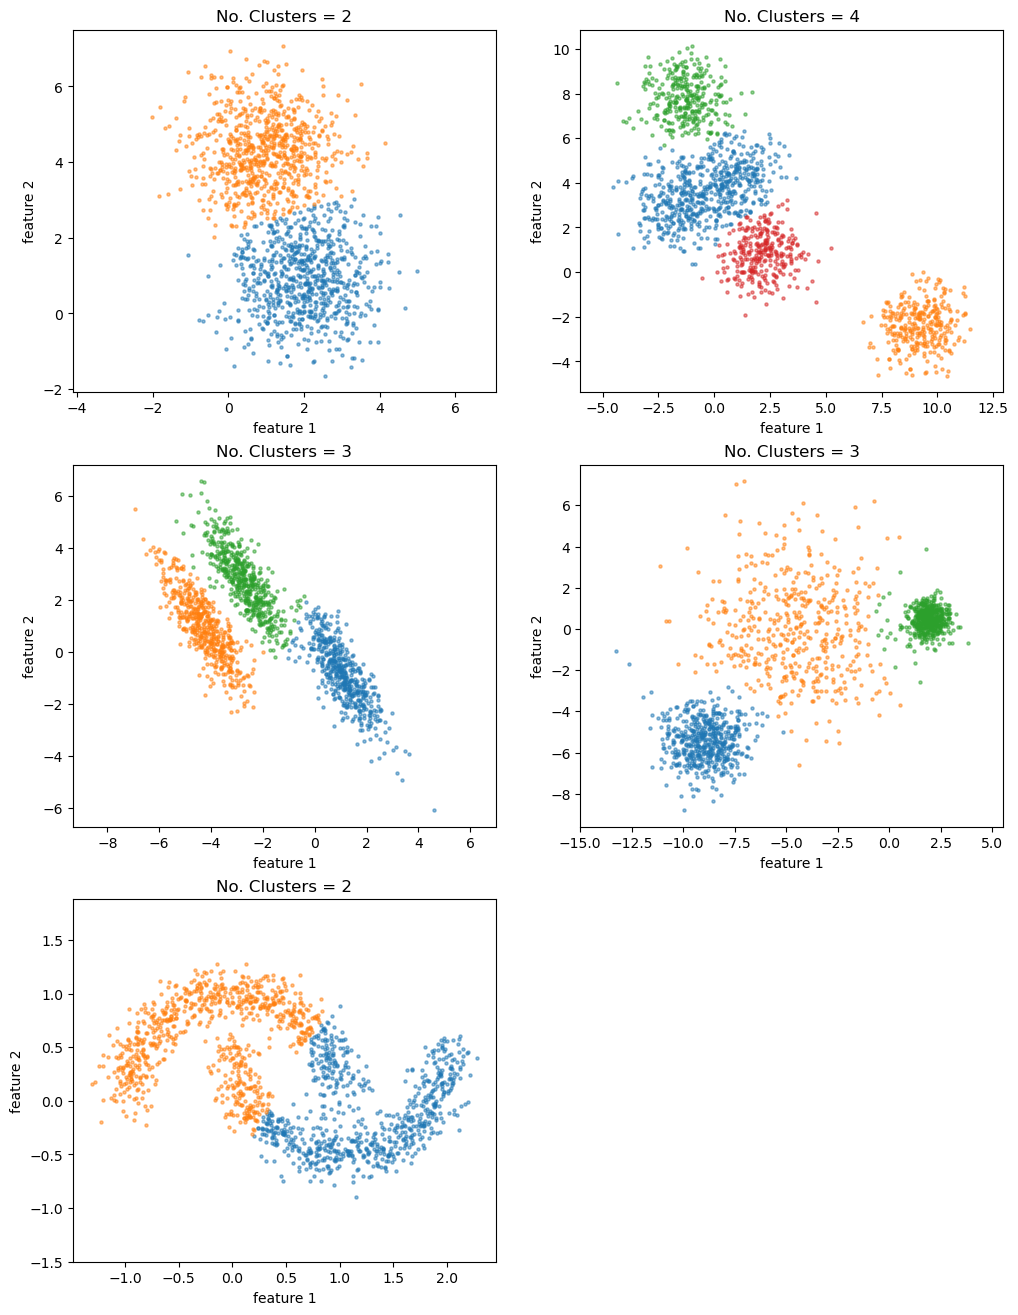

In [9]:
from sklearn.cluster import SpectralClustering

# Fit spectral clustering model to each dataset
spec_0 = SpectralClustering(n_clusters=2).fit_predict(X[0])
spec_1 = SpectralClustering(n_clusters=4).fit_predict(X[1])
spec_2 = SpectralClustering(n_clusters=3).fit_predict(X[2])
spec_3 = SpectralClustering(n_clusters=3).fit_predict(X[3])
spec_4 = SpectralClustering(n_clusters=2).fit_predict(X[4])

# Plot each cluster in different colors
fig, ax = plt.subplots(3, 2, figsize=(12, 16))

plot_cluster(ax[0,0], X[0], spec_0)
plot_cluster(ax[0,1], X[1], spec_1)
plot_cluster(ax[1,0], X[2], spec_2)
plot_cluster(ax[1,1], X[3], spec_3)
plot_cluster(ax[2,0], X[4], spec_4)
ax[2,1].set_axis_off()

### (d) Comparing clustering approaches

<font size="4"> For **Dataset 0** and **Dataset 1**, there were linear boundaries between each cluster, and the within-cluster variation was similar for all of the clusters. For these datasets, K-means and spectral clustering both performed equally well, and it was very easy to tune their parameters - all we had to do was specify the number of clusters. For these two datasets, DBSCAN performed moderately well and took quite a bit of hyperparameter tuning. Even after hyperparameters were tuned, there were quite a few points that weren't assigned to any clusters.
    
<font size="4"> For **Dataset 2**, the two features were correlated. In this case, k-means performed poorly, DBSCAN performed well but took a bit of hyperparameter tuning, and spectral clustering performed just as well as DBSCAN but involved no hyperparameter tuning beyond specifying the number of clusters.
    
<font size="4"> For **Dataset 3**, the within-cluster variation was quite varied across datasets (stated more simply - there were two clusters where the points were quite close together and a cluster where the points were quite spread out). In this case, k-means had moderately good performance and took essentially no hyperparameter tuning, DBSCAN performed quite poorly and also involved quite a bit of hyperparameter tuning, and spectral clustering performed very well and involved essentially no hyperparameter tuning.
    
<font size="4"> For **Dataset 4** the boundary between the two clusters was highly nonlinear. In this case, k-means and spectral clustering both performed poorly, and DBSCAN performed moderately well but involved a significant amount of hyperparameter tuning. I'm surprised that spectral clustering performed poorly on this dataset, because spectral clustering is supposed to excel in situations like this.

## Section 2 - Dimensionality reduction with PCA and t-SNE

In [11]:
################################
# Load the data
################################
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# load dataset
digits = datasets.load_digits()
n_sample = digits.target.shape[0]
n_feature = digits.images.shape[1] * digits.images.shape[2]
X_digits = np.zeros((n_sample, n_feature))
for i in range(n_sample):
    X_digits[i, :] = digits.images[i, :, :].flatten()
y_digits = digits.target

### (a) PCA

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Normalize each feature before applying PCA
X_digits = StandardScaler().fit_transform(X_digits)

# Apply PCA
pca = PCA(n_components=2)
X_digits_transformed = pca.fit_transform(X_digits)

# Sort data based on label
y_digits = y_digits.reshape(-1, 1)
data = np.concatenate((X_digits_transformed, y_digits), axis=1)
df = pd.DataFrame(data=data, columns=["PC 1", "PC 2", "Label"])
zeros = df[df["Label"] == 0]
ones = df[df["Label"] == 1]
twos = df[df["Label"] == 2]
threes = df[df["Label"] == 3]
fours = df[df["Label"] == 4]
fives = df[df["Label"] == 5]
sixes = df[df["Label"] == 6]
sevens = df[df["Label"] == 7]
eights = df[df["Label"] == 8]
nines = df[df["Label"] == 9]

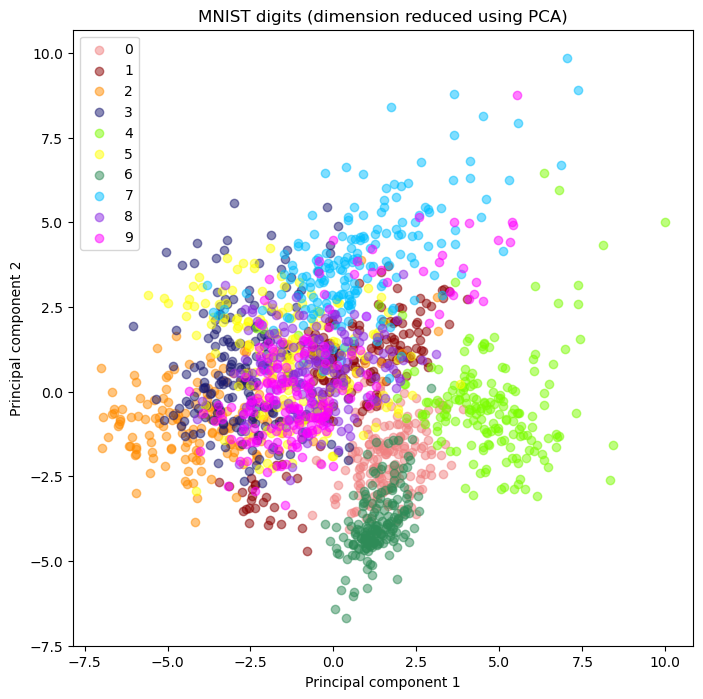

In [13]:
# Plot projected data and color based on labels
fig, ax = plt.subplots(figsize=(8, 8));

ax.scatter(zeros["PC 1"], zeros["PC 2"], label = "0", c="lightcoral", alpha=0.5);
ax.scatter(ones["PC 1"], ones["PC 2"], label = "1", c="darkred", alpha=0.5);
ax.scatter(twos["PC 1"], twos["PC 2"], label = "2", c="darkorange", alpha=0.5);
ax.scatter(threes["PC 1"], threes["PC 2"], label = "3", c="midnightblue", alpha=0.5);
ax.scatter(fours["PC 1"], fours["PC 2"], label = "4", c="lawngreen", alpha=0.5);
ax.scatter(fives["PC 1"], fives["PC 2"], label = "5", c="yellow", alpha=0.5);
ax.scatter(sixes["PC 1"], sixes["PC 2"], label = "6", c="seagreen", alpha=0.5);
ax.scatter(sevens["PC 1"], sevens["PC 2"], label = "7", c="deepskyblue", alpha=0.5);
ax.scatter(eights["PC 1"], eights["PC 2"], label = "8", c="blueviolet", alpha=0.5);
ax.scatter(nines["PC 1"], nines["PC 2"], label = "9", c="fuchsia", alpha=0.5);

ax.set_xlabel("Principal component 1");
ax.set_ylabel("Principal component 2")
ax.set_title("MNIST digits (dimension reduced using PCA)")

plt.legend();

### (b) Plot results from PCA

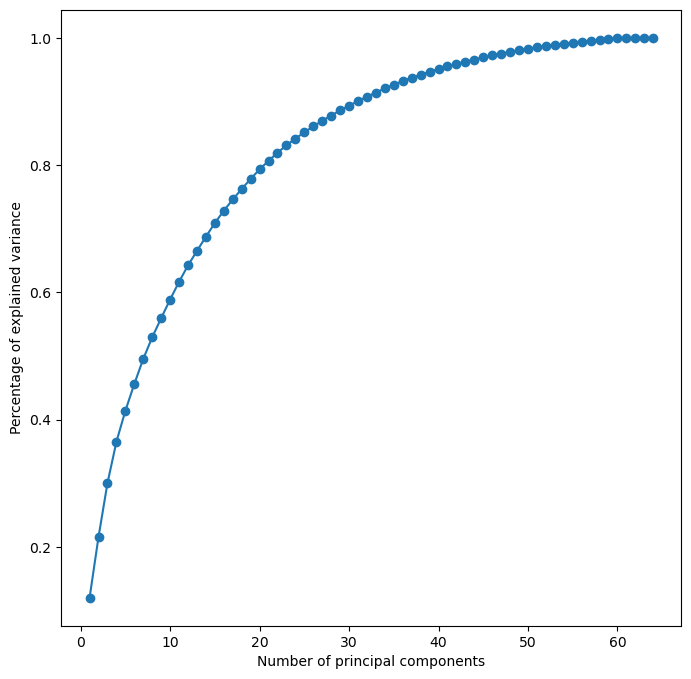

In [14]:
# Use PCA to project data into 64-dimensional space (i.e. use all principal components)
pca_full = PCA(n_components=X_digits.shape[1])
X_digits_all_components = pca_full.fit_transform(X_digits)

# Plot fraction of explained variance as more principal components are added
fig, ax = plt.subplots(figsize=(8, 8))

ax.plot(np.arange(1, 65),
        np.cumsum(pca_full.explained_variance_ratio_),
        marker="o",
        linestyle="-");

ax.set_xlabel("Number of principal components");
ax.set_ylabel("Percentage of explained variance");

In [15]:
# What percentage of the variance in the data is left unexplained
# by the first two principal components?

frac_unexplained_var = 1 - (pca_full.explained_variance_ratio_[0] +
                            pca_full.explained_variance_ratio_[1])

print(f"Fraction of variance left unexplained by the first two principal components: {frac_unexplained_var}")

Fraction of variance left unexplained by the first two principal components: 0.7840502949916722


<font size="4"> Since more than 75% of the variance in the MNIST data is left unexplained by the first two principle components, the clustering above is not very accurate. If, for example, only 25% of the variance were left unexplained by the first two principle components, the clusters above would likely be much more cleanly separated.
    
<font size="4"> At first I forgot to normalize each feature of the dataset before using PCA. Interestingly, and somewhat surprisingly, the cluster plot was noticeably better for the unnormalized data, and the fraction of variance left uneplained by the first two principal components was about 7% lower. I'm confused as to why normalizing the data would significantly hurt the performance of PCA for this dataset.

### (c) t_SNE

In [16]:
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings("ignore")

def tsne_plot(ax, X, y, perplexity, n_iter):
    """ Use t-SNE to reduce dimensionality and plot clusters of data
    
    Parameters
    ----------
    ax
        The axis object to plot on
    X: np.ndarray
        The data to apply t-SNE to
    y: np.array
        Labels for X
    perplexity: int
        The perplexity of the t-SNE model
    n_iter: int
        Number of times to iterate throught the t-SNE algorithm
    
    """
    # Transform the data with tsne
    tsne = TSNE(n_components=2,
                perplexity=perplexity,
                n_iter=n_iter)
    X = tsne.fit_transform(X)
    Xy = np.concatenate((X, y), axis=1)
    df = pd.DataFrame(data=Xy, columns=["PC 1", "PC 2", "Label"])
    # Separate the data according to their labels
    zeros = df[df["Label"] == 0]
    ones = df[df["Label"] == 1]
    twos = df[df["Label"] == 2]
    threes = df[df["Label"] == 3]
    fours = df[df["Label"] == 4]
    fives = df[df["Label"] == 5]
    sixes = df[df["Label"] == 6]
    sevens = df[df["Label"] == 7]
    eights = df[df["Label"] == 8]
    nines = df[df["Label"] == 9]
    # Plot each cluster in a different color
    ax.scatter(zeros["PC 1"], zeros["PC 2"], label = "0", c="lightcoral", alpha=0.5, s=6);
    ax.scatter(ones["PC 1"], ones["PC 2"], label = "1", c="darkred", alpha=0.5, s=6);
    ax.scatter(twos["PC 1"], twos["PC 2"], label = "2", c="darkorange", alpha=0.5, s=6);
    ax.scatter(threes["PC 1"], threes["PC 2"], label = "3", c="midnightblue", alpha=0.5, s=6);
    ax.scatter(fours["PC 1"], fours["PC 2"], label = "4", c="lawngreen", alpha=0.5, s=6);
    ax.scatter(fives["PC 1"], fives["PC 2"], label = "5", c="yellow", alpha=0.5, s=6);
    ax.scatter(sixes["PC 1"], sixes["PC 2"], label = "6", c="seagreen", alpha=0.5, s=6);
    ax.scatter(sevens["PC 1"], sevens["PC 2"], label = "7", c="deepskyblue", alpha=0.5, s=6);
    ax.scatter(eights["PC 1"], eights["PC 2"], label = "8", c="blueviolet", alpha=0.5, s=6);
    ax.scatter(nines["PC 1"], nines["PC 2"], label = "9", c="fuchsia", alpha=0.5, s=6);
    ax.legend();

Text(0.5, 1.0, 'Perplexity: 50, n_iter: 5000')

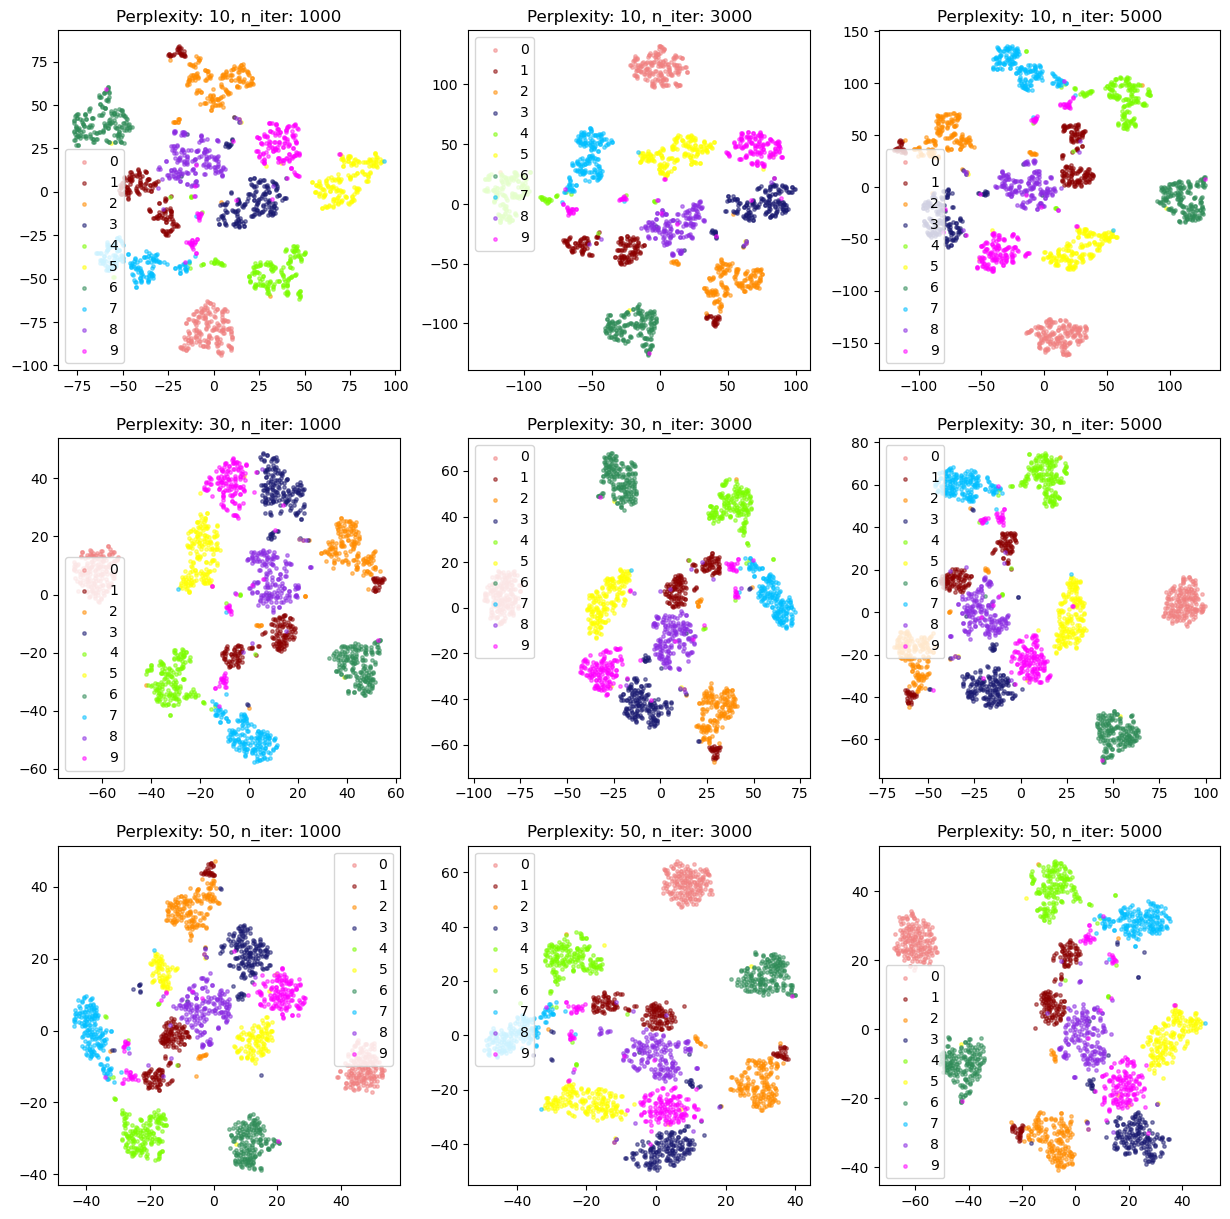

In [17]:
# Use PCA to reduce dimension from 64 to 50, as recommended in the sklearn docs for TSNE
X_digits_prepped = PCA(n_components=50).fit_transform(X_digits)

fig, ax = plt.subplots(3, 3, figsize=(15, 15))

tsne_plot(ax[0,0], X_digits_prepped, y_digits, 10, 1000)
ax[0,0].set_title("Perplexity: 10, n_iter: 1000")

tsne_plot(ax[0,1], X_digits_prepped, y_digits, 10, 3000)
ax[0,1].set_title("Perplexity: 10, n_iter: 3000")

tsne_plot(ax[0,2], X_digits_prepped, y_digits, 10, 5000)
ax[0,2].set_title("Perplexity: 10, n_iter: 5000")

tsne_plot(ax[1,0], X_digits_prepped, y_digits, 30, 1000)
ax[1,0].set_title("Perplexity: 30, n_iter: 1000")

tsne_plot(ax[1,1], X_digits_prepped, y_digits, 30, 3000)
ax[1,1].set_title("Perplexity: 30, n_iter: 3000")

tsne_plot(ax[1,2], X_digits_prepped, y_digits, 30, 5000)
ax[1,2].set_title("Perplexity: 30, n_iter: 5000")

tsne_plot(ax[2,0], X_digits_prepped, y_digits, 50, 1000)
ax[2,0].set_title("Perplexity: 50, n_iter: 1000")

tsne_plot(ax[2,1], X_digits_prepped, y_digits, 50, 3000)
ax[2,1].set_title("Perplexity: 50, n_iter: 3000")

tsne_plot(ax[2,2], X_digits_prepped, y_digits, 50, 5000)
ax[2,2].set_title("Perplexity: 50, n_iter: 5000")

<font size="4"> Many of the plots above are quite similar to one another. None of the t-SNE models do a perfect job of clustering the data (there are overlaps between clusters), but all of them perform better than PCA for this dataset. It seems as though the very first model (perplexity=10, n_iter=1000) performs the best; the clusters are more cleanly separated than in any other plot.

### (d) Comparing PCA and t-SNE

<font size="4"> **Which algorithm performs better on MNIST?**
    
<font size="4"> The t-SNE algorithm clearly clusters the MNIST data better than PCA in the case of two-dimensions. This is because t-SNE specializes in projecting data into low-dimensional spaces. PCA would have performed better if there were more multi-colinearity between the 64 features in the original dataset. High multi-colinearity means that many features are superfluous; they are not needed in order to accurately represent the data and can be removed. Therefore, when PCA reduces the dimension of a dataset with high multi-colinearity between features, there is a large fraction of explained variance in the first few principal components (unlike in the case of the MNIST database).
    
    
<font size="4"> **Why do the fit and fit_transform methods of t-SNE do the same thing?**
    
<font size="4"> The PCA fit method corresponds to finding the number of desired principal components. Then when we transform the data using an already-fit PCA object, that corresponds to actually projecting the data onto those principal components. So there is a separation between computing the principal components and actually projecting the data onto those principal components. The former can be done independently of the latter. If we wanted to, we could fit a PCA object to a dataset and then use the fitted object to transform a different dataset. This is useful when we want to use PCA as part of preprocessing for supervised learning; we can fit a PCA object to the training data, then use that object to transform both the training and test data (much like when we normalize the training data, we want to use the mean and standard deviation from the *training* features to transform the test data).
    
<font size="4"> The t-SNE algorithm, on the other hand, iteratively transforms the data. Going from step to step through the algorith involves transforming the data at every step. There is no sense in which you can glean information about the data (like when PCA finds the principal components) and then use that gleaned information all at once to do a big transformation. The transformation happens gradually. This means that we can't use t-SNE as a preprocessing step for supervised learning if we also need to preprocess the test data.
    
<font size="4"> Source that gave me inspiration for the above answer: https://towardsdatascience.com/t-sne-clearly-explained-d84c537f53a